In [24]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm
import scipy.optimize


#from my_functions import find_min_distance

In [4]:
px_size = 0.1625
dt = 15 #frame interval in seconds

In [340]:
#directory = 'Baz_Jupiter//intensities_all_frames//'
#title="Bazooka_ablation"
#dt = 30 #frame interval in seconds


directory = 'Par1_Baz//'
title="Bazooka_ablation"
dt = 60 #frame interval in seconds


#directory = 'Par1_Jupiter_long//'
#title="Par1_ablation"
#dt = 600 #frame interval in seconds

#directory = 'aPKC_Baz_long//'
#title="aPKC_Baz_ablation"
#dt = 600 #frame interval in seconds


#directory = 'Par1_Baz_long//'
#title="Par1_ablation"
#dt = 600 #frame interval in seconds

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Par1//"
#title="Par1_FRAP"

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Bazooka//"
#title="Bazooka_FRAP"


files = listdir(directory)

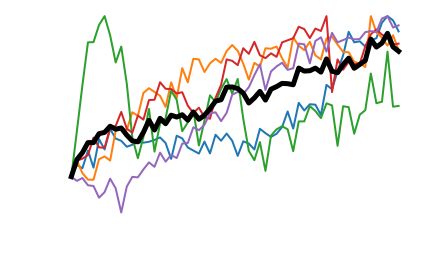

In [341]:

#COLOR = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 3))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)


intensities_all = pd.DataFrame()

red_x0 = []
green_x0 = []

for index, file in enumerate(files[0::2]):
#for index, file in enumerate(files[0::4]):

    intensities = pd.read_csv(directory+file)#[0:60]
    background = pd.read_csv(directory+files[index*2+1])#[0:60]

    #subtract background
    intensities["Background_norm"] = (intensities.Mean-background.Mean)

    intensities["Mean"] = intensities.Background_norm
    
    #normalize
    if "ablation" in title:
        intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean/intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        #intensities["Normalized"] = intensities.Mean
    else:
    #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[2]
    
    intensities[file] = intensities["Normalized"]/intensities["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]

    #index = pd.date_range('1/1/2000', periods=len(final_intensities), freq='30s')
    #series = pd.Series(final_intensities.values, index=index)
    #final_intensities = series.resample("2 min").mean()






    if len(intensities)>0 and "red" in file: #and (intensities.Mean/intensities.Mean[0]).iloc[-1]<0.5:
        intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
     
        ax.plot(np.arange(len(final_intensities))*dt, final_intensities, linewidth=2)

        #xs = np.arange(len(final_intensities))*dt
        #ys = final_intensities
        #p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess
        #popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, maxfev=10000)
        #L, x0, k, b = popt
        # plot the results
        #ax.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")


 




intensities_all['Mean'] = intensities_all.mean(axis=1)
ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="black")


#ax.plot(xs, monoExp(xs, m, t), linewidth=5, color="black")


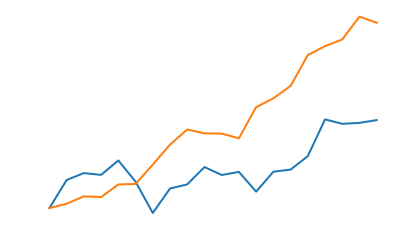

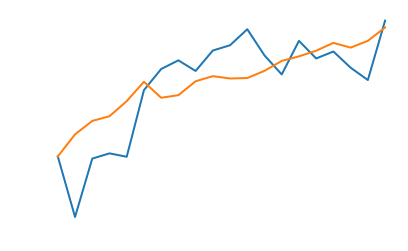

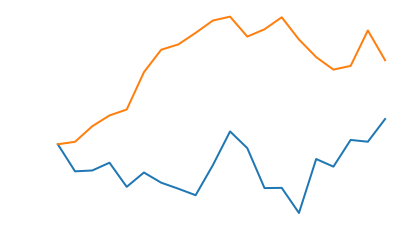

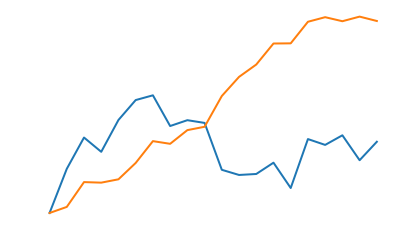

In [244]:

#COLOR = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)


intensities_all = pd.DataFrame()
intensities_all_red = pd.DataFrame()


for index, file in enumerate(files[0::4]):

    intensities = pd.read_csv(directory+file)
    background = pd.read_csv(directory+files[index*4+1])


    intensities_red = pd.read_csv(directory+files[index*4+2])
    background_red = pd.read_csv(directory+files[index*4+3])


    #subtract background
    intensities["Background_norm"] = (intensities.Mean-background.Mean)
    intensities["Mean"] = intensities.Background_norm

    intensities_red["Background_norm"] = (intensities_red.Mean-background_red.Mean)
    intensities_red["Mean"] = intensities_red.Background_norm
    
    #normalize
    if "ablation" in title:
        #intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean/intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
        intensities_red["Normalized"] = intensities_red.Mean - intensities_red.Mean[0]
    else:
    #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[2]
    
    intensities[file] = intensities["Normalized"]
    intensities_red[files[index*2+1]] = intensities_red["Normalized"]#/intensities["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]
    final_intensities_red = intensities_red.reset_index()[files[index*2+1]]

    #index = pd.date_range('1/1/2000', periods=len(final_intensities), freq='30s')
    #series = pd.Series(final_intensities.values, index=index)
    #final_intensities = series.resample("2 min").mean()




    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(5, 3))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])



    if len(intensities)>0: #and "red" in file: #and (intensities.Mean/intensities.Mean[0]).iloc[-1]<0.5:
        intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
        intensities_all_red = pd.concat([intensities_all_red, final_intensities_red], axis=1)

        ax.plot(np.arange(len(final_intensities))*dt, final_intensities, linewidth=2)
        ax.plot(np.arange(len(final_intensities_red))*dt, final_intensities_red, linewidth=2)

        #xs = np.arange(len(final_intensities))*dt
        #ys = final_intensities
        #p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess
        #popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, maxfev=10000)
        #L, x0, k, b = popt
        # plot the results
        #ax.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")


 




intensities_all['Mean'] = intensities_all.mean(axis=1)
#ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="black")


#ax.plot(xs, monoExp(xs, m, t), linewidth=5, color="black")


In [212]:
files

['20201119_Oocyte3_green.csv',
 '20201119_Oocyte3_green_background.csv',
 '20201119_Oocyte3_red.csv',
 '20201119_Oocyte3_red_background.csv',
 '20201119_Oocyte7_green.csv',
 '20201119_Oocyte7_green_background.csv',
 '20201119_Oocyte7_red.csv',
 '20201119_Oocyte7_red_background.csv',
 '20201120_Oocyte3_green.csv',
 '20201120_Oocyte3_green_background.csv',
 '20201120_Oocyte3_red.csv',
 '20201120_Oocyte3_red_background.csv',
 '20201126_Oocyte1_green.csv',
 '20201126_Oocyte1_green_background.csv',
 '20201126_Oocyte1_red.csv',
 '20201126_Oocyte1_red_background.csv',
 '20201126_Oocyte3_green.csv',
 '20201126_Oocyte3_green_background.csv',
 '20201126_Oocyte3_red.csv',
 '20201126_Oocyte3_red_background.csv']

In [208]:
intensities_all_red

,20201119_Oocyte3_green_background.csv,20201119_Oocyte3_red_background.csv,20201119_Oocyte7_green_background.csv,20201119_Oocyte7_red_background.csv,20201120_Oocyte3_green_background.csv
0,0.000,0.000,0.000,0.000,0.000
1,9.863,40.783,10.973,140.622,16.941
2,7.031,72.970,2.409,205.072,34.080
3,21.927,-96.492,-2.060,324.509,50.077
4,7.551,-41.496,-2.105,348.191,50.169
...,...,...,...,...,...
85,NaN,NaN,NaN,148.430,42.249
86,NaN,NaN,NaN,142.975,69.439
87,NaN,NaN,NaN,147.481,59.433
88,NaN,NaN,NaN,151.144,60.774


In [16]:

fig.savefig(f'{title}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}.png', dpi=300, transparent=True, bbox_inches='tight')

#fig.savefig(f'{title}.pdf', dpi=300, transparent=False, bbox_inches='tight')
#fig.savefig(f'{title}.png', dpi=300, transparent=False, bbox_inches='tight')

In [331]:
#par1_mean = intensities_all.Mean
#baz_mean = intensities_all.Mean
baz_mean_ablation = intensities_all.Mean

NameError: name 'baz_mean' is not defined

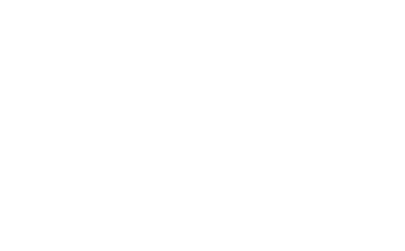

In [52]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.arange(70)*dt, baz_mean[0:70], linewidth=5, color="orange")
ax.plot(np.arange(70)*dt, par1_mean[0:70], linewidth=5, color="blue")


In [257]:

def monoExp(x, m, t, k):
    #return m * (1-np.exp(-t * x))+k
    return m * (np.exp(-t * x))+k


def monoExp2(x, m, t, k):
    return m * (1-np.exp(-t * x))+k


Text(0.5, 1.0, 'Original Data')

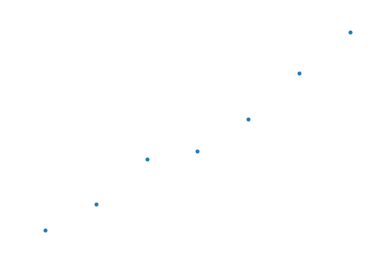

In [332]:
#xs = np.arange(34)*dt
#ys = par1_mean[2:36]


#xs = np.arange(68)*dt
#ys = baz_mean[2:70]


ys = baz_mean_ablation[0:130]
xs = np.arange(len(ys))*dt

plt.plot(xs, ys, '.')
plt.title("Original Data")

In [251]:
m_baz, t_baz, k_baz = params

R² = -216374980.09477785
Y = 4545.635886368068 * (1-e^(-5.6079674139729895e-08 * x))
T_1/2 = 12360042.94234802


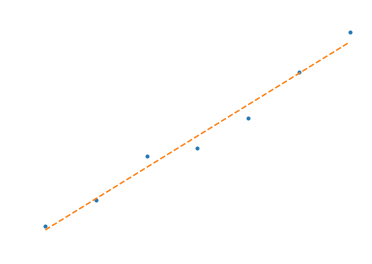

In [336]:
# perform the fit
#p0=[1,1]
p0 = [1, -np.log(0.5)/300, min(ys)]
params, cv = scipy.optimize.curve_fit(monoExp2, xs, ys, p0, maxfev=10000)
m, t, k = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, k))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp2(xs, m, t, k), '--', label="fitted")
plt.title("Fitted Exponential Curve")

#plt.plot(xs, monoExp2(xs, m_baz, t_baz, k_baz), '--', label="fitted")

# inspect the parameters
print(f"Y = {m} * (1-e^(-{t} * x))")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")

[ 1.44106570e+02  1.73635440e+03  5.35932433e-06 -7.15714595e+01]


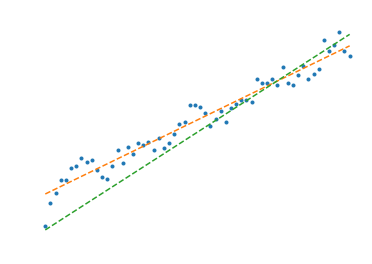

In [342]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

baz_mean_ablation = intensities_all.Mean
ys_sigm = baz_mean_ablation[0:130]
#ys = baz_mean_ablation

#index = pd.date_range('1/1/2000', periods=len(ys_sigm), freq='60s')
#series = pd.Series(ys_sigm.values, index=index)
#ys_sigm = series.resample("10 min").mean()

xs_sigm = np.arange(len(ys_sigm))*dt

p0 = [max(ys_sigm), np.median(xs_sigm),0,min(ys_sigm)] # this is an mandatory initial guess

popt, pcov = scipy.optimize.curve_fit(sigmoid, xs_sigm, ys_sigm,p0, maxfev = 10000)#, method='dogbox')

L_sigm, x0_sigm, k_sigm, b_sigm = popt

# plot the results
plt.plot(xs_sigm, ys_sigm, '.', label="data")
plt.plot(xs_sigm, sigmoid(xs_sigm, L_sigm, x0_sigm, k_sigm, b_sigm), '--', label="fitted")
plt.title("Fitted Sigmoidal Curve")
print(popt)
plt.plot(xs_sigm, monoExp2(xs_sigm, m, t, k), '--', label="fitted")
#plt.plot(xs_sigm, monoExp2(xs_sigm, m_baz, t_baz, k_baz), '--', label="fitted")



In [70]:
dt

600